In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.1.0


In [3]:
print(keras.__version__)

2.3.1


In [4]:
!pip install matplotlib

  Using cached matplotlib-3.2.2-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)


In [5]:
#-*- coding: utf-8 -*-

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [6]:
# 이미지 저장될 폴더가 없다면 만듭니다.
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")

np.random.seed(3)
tf.random.set_seed(3)

In [7]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [8]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

discriminator.trainable = False

In [9]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.7101  g_loss:0.6986
epoch:1  d_loss:0.4348  g_loss:0.3323
epoch:2  d_loss:0.5332  g_loss:0.1001
epoch:3  d_loss:0.7525  g_loss:0.0610
epoch:4  d_loss:0.6897  g_loss:0.1291
epoch:5  d_loss:0.5406  g_loss:0.3776
epoch:6  d_loss:0.4938  g_loss:0.7601
epoch:7  d_loss:0.5135  g_loss:0.9300
epoch:8  d_loss:0.5170  g_loss:1.0348
epoch:9  d_loss:0.4713  g_loss:0.9867
epoch:10  d_loss:0.4003  g_loss:0.9850
epoch:11  d_loss:0.3561  g_loss:0.9798
epoch:12  d_loss:0.3668  g_loss:0.9473
epoch:13  d_loss:0.2789  g_loss:0.9041
epoch:14  d_loss:0.4284  g_loss:0.8314
epoch:15  d_loss:0.5065  g_loss:0.6804
epoch:16  d_loss:0.5457  g_loss:1.1380
epoch:17  d_loss:0.6547  g_loss:0.9659
epoch:18  d_loss:0.7113  g_loss:0.6186
epoch:19  d_loss:0.5420  g_loss:0.8030
epoch:20  d_loss:0.6327  g_loss:0.7491
epoch:21  d_loss:0.6356  g_loss:0.8646
epoch:22  d_loss:0.6120  g_loss:0.8721
epoch:23  d_loss:0.5012  g_loss:0.8007
epoch:24  d_loss:0.5263  g_loss:0.7855
epoch:25  d_loss:0.5256  g_loss:0.7

epoch:208  d_loss:0.4878  g_loss:1.7412
epoch:209  d_loss:0.4506  g_loss:1.7564
epoch:210  d_loss:0.3761  g_loss:2.0756
epoch:211  d_loss:0.4027  g_loss:2.1670
epoch:212  d_loss:0.5965  g_loss:1.7501
epoch:213  d_loss:0.5894  g_loss:1.7532
epoch:214  d_loss:0.5780  g_loss:1.5785
epoch:215  d_loss:0.4207  g_loss:1.6193
epoch:216  d_loss:0.4772  g_loss:2.0876
epoch:217  d_loss:0.4409  g_loss:1.7222
epoch:218  d_loss:0.5552  g_loss:1.9989
epoch:219  d_loss:0.5206  g_loss:1.7474
epoch:220  d_loss:0.5341  g_loss:1.5364
epoch:221  d_loss:0.5337  g_loss:1.4986
epoch:222  d_loss:0.4206  g_loss:1.6520
epoch:223  d_loss:0.4418  g_loss:1.7668
epoch:224  d_loss:0.4427  g_loss:1.9468
epoch:225  d_loss:0.3873  g_loss:2.3439
epoch:226  d_loss:0.4652  g_loss:1.9915
epoch:227  d_loss:0.4840  g_loss:1.8571
epoch:228  d_loss:0.5967  g_loss:1.7597
epoch:229  d_loss:0.4294  g_loss:1.6004
epoch:230  d_loss:0.5412  g_loss:1.7064
epoch:231  d_loss:0.5619  g_loss:1.8834
epoch:232  d_loss:0.5397  g_loss:2.0719


epoch:413  d_loss:0.2041  g_loss:2.4513
epoch:414  d_loss:0.2936  g_loss:2.6371
epoch:415  d_loss:0.3053  g_loss:3.2172
epoch:416  d_loss:0.3592  g_loss:2.4239
epoch:417  d_loss:0.3346  g_loss:2.2533
epoch:418  d_loss:0.2828  g_loss:2.3770
epoch:419  d_loss:0.3334  g_loss:2.4307
epoch:420  d_loss:0.4996  g_loss:2.5536
epoch:421  d_loss:0.1935  g_loss:2.5966
epoch:422  d_loss:0.4220  g_loss:2.4801
epoch:423  d_loss:0.3955  g_loss:2.3914
epoch:424  d_loss:0.4854  g_loss:2.0107
epoch:425  d_loss:0.2271  g_loss:3.0875
epoch:426  d_loss:0.3258  g_loss:2.5566
epoch:427  d_loss:0.3066  g_loss:3.0635
epoch:428  d_loss:0.3367  g_loss:2.4841
epoch:429  d_loss:0.4158  g_loss:2.2965
epoch:430  d_loss:0.3398  g_loss:1.6465
epoch:431  d_loss:0.3333  g_loss:2.4560
epoch:432  d_loss:0.2793  g_loss:3.2379
epoch:433  d_loss:0.5567  g_loss:2.6777
epoch:434  d_loss:0.4807  g_loss:2.1197
epoch:435  d_loss:0.3542  g_loss:2.2308
epoch:436  d_loss:0.3705  g_loss:2.4063
epoch:437  d_loss:0.3190  g_loss:3.0880


epoch:618  d_loss:0.5890  g_loss:2.0134
epoch:619  d_loss:0.5960  g_loss:1.6098
epoch:620  d_loss:0.8162  g_loss:1.1533
epoch:621  d_loss:0.6034  g_loss:0.7846
epoch:622  d_loss:0.7742  g_loss:0.6931
epoch:623  d_loss:0.6978  g_loss:0.7532
epoch:624  d_loss:0.6373  g_loss:0.7729
epoch:625  d_loss:0.6637  g_loss:0.9781
epoch:626  d_loss:0.7759  g_loss:1.0649
epoch:627  d_loss:0.5745  g_loss:1.5512
epoch:628  d_loss:0.6608  g_loss:1.0805
epoch:629  d_loss:0.4763  g_loss:0.9168
epoch:630  d_loss:0.7212  g_loss:0.8915
epoch:631  d_loss:0.5710  g_loss:1.1401
epoch:632  d_loss:0.5412  g_loss:1.4010
epoch:633  d_loss:0.6816  g_loss:1.6178
epoch:634  d_loss:0.6767  g_loss:1.2513
epoch:635  d_loss:0.6628  g_loss:1.0977
epoch:636  d_loss:0.5733  g_loss:1.4528
epoch:637  d_loss:0.5948  g_loss:1.7591
epoch:638  d_loss:0.6606  g_loss:2.0601
epoch:639  d_loss:0.5356  g_loss:1.5238
epoch:640  d_loss:0.4488  g_loss:1.5407
epoch:641  d_loss:0.5571  g_loss:1.2212
epoch:642  d_loss:0.6170  g_loss:1.5956


epoch:823  d_loss:0.4323  g_loss:1.7670
epoch:824  d_loss:0.4786  g_loss:1.8767
epoch:825  d_loss:0.4224  g_loss:1.9076
epoch:826  d_loss:0.3563  g_loss:1.9093
epoch:827  d_loss:0.3425  g_loss:2.1535
epoch:828  d_loss:0.2750  g_loss:2.3114
epoch:829  d_loss:0.2955  g_loss:2.0344
epoch:830  d_loss:0.3331  g_loss:2.3634
epoch:831  d_loss:0.4779  g_loss:1.9504
epoch:832  d_loss:0.2722  g_loss:2.2235
epoch:833  d_loss:0.2776  g_loss:2.5122
epoch:834  d_loss:0.3143  g_loss:2.4619
epoch:835  d_loss:0.2495  g_loss:2.5393
epoch:836  d_loss:0.2841  g_loss:2.0778
epoch:837  d_loss:0.2326  g_loss:2.3292
epoch:838  d_loss:0.2569  g_loss:2.0263
epoch:839  d_loss:0.2667  g_loss:2.2775
epoch:840  d_loss:0.2142  g_loss:2.4376
epoch:841  d_loss:0.2229  g_loss:2.6364
epoch:842  d_loss:0.4077  g_loss:2.1424
epoch:843  d_loss:0.3122  g_loss:2.2090
epoch:844  d_loss:0.2483  g_loss:2.3112
epoch:845  d_loss:0.3263  g_loss:2.0498
epoch:846  d_loss:0.3368  g_loss:2.4563
epoch:847  d_loss:0.3670  g_loss:2.1108


epoch:1028  d_loss:0.4531  g_loss:1.8516
epoch:1029  d_loss:0.5334  g_loss:2.1545
epoch:1030  d_loss:0.3477  g_loss:2.1791
epoch:1031  d_loss:0.8565  g_loss:1.5704
epoch:1032  d_loss:0.6151  g_loss:2.0316
epoch:1033  d_loss:0.4662  g_loss:1.7515
epoch:1034  d_loss:0.3825  g_loss:2.4035
epoch:1035  d_loss:0.5853  g_loss:2.4086
epoch:1036  d_loss:0.7696  g_loss:2.1528
epoch:1037  d_loss:0.4832  g_loss:1.4641
epoch:1038  d_loss:0.3872  g_loss:1.6036
epoch:1039  d_loss:0.5298  g_loss:2.0715
epoch:1040  d_loss:0.4219  g_loss:2.4085
epoch:1041  d_loss:0.5386  g_loss:1.9857
epoch:1042  d_loss:0.6490  g_loss:1.7273
epoch:1043  d_loss:0.6395  g_loss:1.7407
epoch:1044  d_loss:0.3241  g_loss:1.9554
epoch:1045  d_loss:0.4808  g_loss:2.2079
epoch:1046  d_loss:0.2853  g_loss:2.2158
epoch:1047  d_loss:0.3275  g_loss:2.0555
epoch:1048  d_loss:0.3083  g_loss:2.1821
epoch:1049  d_loss:0.4075  g_loss:2.0025
epoch:1050  d_loss:0.4703  g_loss:1.9559
epoch:1051  d_loss:0.4666  g_loss:1.9118
epoch:1052  d_lo

epoch:1228  d_loss:0.9622  g_loss:1.1274
epoch:1229  d_loss:0.4909  g_loss:1.8586
epoch:1230  d_loss:0.3555  g_loss:2.3388
epoch:1231  d_loss:0.4851  g_loss:2.0182
epoch:1232  d_loss:0.5508  g_loss:1.6141
epoch:1233  d_loss:0.4046  g_loss:2.1600
epoch:1234  d_loss:0.5412  g_loss:1.5708
epoch:1235  d_loss:0.6192  g_loss:1.4415
epoch:1236  d_loss:0.4966  g_loss:1.6760
epoch:1237  d_loss:0.5305  g_loss:1.6402
epoch:1238  d_loss:0.4936  g_loss:1.8903
epoch:1239  d_loss:0.3627  g_loss:1.8515
epoch:1240  d_loss:0.3026  g_loss:2.0913
epoch:1241  d_loss:0.4397  g_loss:1.7874
epoch:1242  d_loss:0.4442  g_loss:1.7554
epoch:1243  d_loss:0.4215  g_loss:1.8540
epoch:1244  d_loss:0.3445  g_loss:2.5328
epoch:1245  d_loss:0.4058  g_loss:2.0542
epoch:1246  d_loss:0.3958  g_loss:2.1214
epoch:1247  d_loss:0.4201  g_loss:1.7357
epoch:1248  d_loss:0.3697  g_loss:1.6140
epoch:1249  d_loss:0.3754  g_loss:1.4802
epoch:1250  d_loss:0.3509  g_loss:2.0990
epoch:1251  d_loss:0.3839  g_loss:2.2882
epoch:1252  d_lo

epoch:1428  d_loss:0.3988  g_loss:2.2162
epoch:1429  d_loss:0.4845  g_loss:2.0114
epoch:1430  d_loss:0.5004  g_loss:2.0158
epoch:1431  d_loss:0.4722  g_loss:1.8651
epoch:1432  d_loss:0.4035  g_loss:1.5742
epoch:1433  d_loss:0.4115  g_loss:1.6217
epoch:1434  d_loss:0.3165  g_loss:1.9372
epoch:1435  d_loss:0.3521  g_loss:2.1924
epoch:1436  d_loss:0.4404  g_loss:2.0087
epoch:1437  d_loss:0.3075  g_loss:2.1336
epoch:1438  d_loss:0.3900  g_loss:2.6312
epoch:1439  d_loss:0.4856  g_loss:2.0493
epoch:1440  d_loss:0.4603  g_loss:1.8975
epoch:1441  d_loss:0.4563  g_loss:1.5381
epoch:1442  d_loss:0.3746  g_loss:2.0667
epoch:1443  d_loss:0.6158  g_loss:1.8816
epoch:1444  d_loss:0.2990  g_loss:3.3769
epoch:1445  d_loss:0.4956  g_loss:2.5172
epoch:1446  d_loss:0.5347  g_loss:1.9805
epoch:1447  d_loss:0.4840  g_loss:1.6447
epoch:1448  d_loss:0.3716  g_loss:2.1593
epoch:1449  d_loss:0.4437  g_loss:1.9171
epoch:1450  d_loss:0.4672  g_loss:1.8497
epoch:1451  d_loss:0.5482  g_loss:1.8008
epoch:1452  d_lo

epoch:1628  d_loss:0.5186  g_loss:1.6076
epoch:1629  d_loss:0.5692  g_loss:1.3287
epoch:1630  d_loss:0.5387  g_loss:1.2888
epoch:1631  d_loss:0.4777  g_loss:1.5599
epoch:1632  d_loss:0.4935  g_loss:1.8652
epoch:1633  d_loss:0.5232  g_loss:1.8096
epoch:1634  d_loss:0.4030  g_loss:1.9170
epoch:1635  d_loss:0.6595  g_loss:1.1435
epoch:1636  d_loss:0.4061  g_loss:1.0986
epoch:1637  d_loss:0.4694  g_loss:1.3442
epoch:1638  d_loss:0.5635  g_loss:1.5261
epoch:1639  d_loss:0.5132  g_loss:1.7551
epoch:1640  d_loss:0.4935  g_loss:1.8664
epoch:1641  d_loss:0.3529  g_loss:1.5793
epoch:1642  d_loss:0.5462  g_loss:1.5105
epoch:1643  d_loss:0.5184  g_loss:1.2967
epoch:1644  d_loss:0.4527  g_loss:1.8079
epoch:1645  d_loss:0.4961  g_loss:1.3525
epoch:1646  d_loss:0.3380  g_loss:1.7228
epoch:1647  d_loss:0.5509  g_loss:2.0177
epoch:1648  d_loss:0.5227  g_loss:1.7026
epoch:1649  d_loss:0.6686  g_loss:1.4541
epoch:1650  d_loss:0.5259  g_loss:1.4478
epoch:1651  d_loss:0.4524  g_loss:1.6923
epoch:1652  d_lo

epoch:1828  d_loss:0.4414  g_loss:1.6608
epoch:1829  d_loss:0.5460  g_loss:1.4935
epoch:1830  d_loss:0.5618  g_loss:1.4917
epoch:1831  d_loss:0.6420  g_loss:1.3929
epoch:1832  d_loss:0.5317  g_loss:1.5294
epoch:1833  d_loss:0.5105  g_loss:1.3525
epoch:1834  d_loss:0.5054  g_loss:1.6754
epoch:1835  d_loss:0.4109  g_loss:1.8162
epoch:1836  d_loss:0.4575  g_loss:1.5508
epoch:1837  d_loss:0.4895  g_loss:1.4963
epoch:1838  d_loss:0.4829  g_loss:1.6289
epoch:1839  d_loss:0.5684  g_loss:1.4472
epoch:1840  d_loss:0.4856  g_loss:1.2437
epoch:1841  d_loss:0.4995  g_loss:1.3165
epoch:1842  d_loss:0.4711  g_loss:1.5510
epoch:1843  d_loss:0.4374  g_loss:1.7425
epoch:1844  d_loss:0.6533  g_loss:1.4808
epoch:1845  d_loss:0.4491  g_loss:1.8307
epoch:1846  d_loss:0.4929  g_loss:1.5243
epoch:1847  d_loss:0.5169  g_loss:1.2290
epoch:1848  d_loss:0.4869  g_loss:1.4778
epoch:1849  d_loss:0.6039  g_loss:1.4966
epoch:1850  d_loss:0.5042  g_loss:1.2578
epoch:1851  d_loss:0.4808  g_loss:1.2849
epoch:1852  d_lo

epoch:2028  d_loss:0.4626  g_loss:1.6125
epoch:2029  d_loss:0.5343  g_loss:1.4586
epoch:2030  d_loss:0.5727  g_loss:1.6466
epoch:2031  d_loss:0.5586  g_loss:1.4465
epoch:2032  d_loss:0.5624  g_loss:1.7072
epoch:2033  d_loss:0.6056  g_loss:1.6189
epoch:2034  d_loss:0.4667  g_loss:1.5603
epoch:2035  d_loss:0.4013  g_loss:1.5127
epoch:2036  d_loss:0.5034  g_loss:1.2858
epoch:2037  d_loss:0.5171  g_loss:1.3268
epoch:2038  d_loss:0.4546  g_loss:1.6932
epoch:2039  d_loss:0.4784  g_loss:1.5539
epoch:2040  d_loss:0.4333  g_loss:1.7470
epoch:2041  d_loss:0.4368  g_loss:1.7750
epoch:2042  d_loss:0.3962  g_loss:1.8032
epoch:2043  d_loss:0.5877  g_loss:1.5528
epoch:2044  d_loss:0.4950  g_loss:1.6922
epoch:2045  d_loss:0.5940  g_loss:1.3087
epoch:2046  d_loss:0.4771  g_loss:1.4751
epoch:2047  d_loss:0.4262  g_loss:1.6964
epoch:2048  d_loss:0.3944  g_loss:2.3725
epoch:2049  d_loss:0.6110  g_loss:1.5737
epoch:2050  d_loss:0.5116  g_loss:1.4260
epoch:2051  d_loss:0.3847  g_loss:1.3890
epoch:2052  d_lo

epoch:2228  d_loss:0.4737  g_loss:1.7300
epoch:2229  d_loss:0.7517  g_loss:1.2027
epoch:2230  d_loss:0.5832  g_loss:1.3737
epoch:2231  d_loss:0.6857  g_loss:1.4369
epoch:2232  d_loss:0.4753  g_loss:1.6501
epoch:2233  d_loss:0.4448  g_loss:1.6536
epoch:2234  d_loss:0.4838  g_loss:1.6616
epoch:2235  d_loss:0.4404  g_loss:1.4437
epoch:2236  d_loss:0.4703  g_loss:1.6266
epoch:2237  d_loss:0.4036  g_loss:1.4859
epoch:2238  d_loss:0.4568  g_loss:1.5385
epoch:2239  d_loss:0.4467  g_loss:2.0333
epoch:2240  d_loss:0.4158  g_loss:1.7259
epoch:2241  d_loss:0.4440  g_loss:1.8016
epoch:2242  d_loss:0.4387  g_loss:1.6448
epoch:2243  d_loss:0.5777  g_loss:1.3436
epoch:2244  d_loss:0.4911  g_loss:1.8791
epoch:2245  d_loss:0.5444  g_loss:1.6774
epoch:2246  d_loss:0.4485  g_loss:1.6455
epoch:2247  d_loss:0.4857  g_loss:1.8856
epoch:2248  d_loss:0.4650  g_loss:1.3872
epoch:2249  d_loss:0.3937  g_loss:1.5257
epoch:2250  d_loss:0.5416  g_loss:1.9118
epoch:2251  d_loss:0.4119  g_loss:2.0463
epoch:2252  d_lo

epoch:2428  d_loss:0.5425  g_loss:1.6720
epoch:2429  d_loss:0.4987  g_loss:1.5311
epoch:2430  d_loss:0.5546  g_loss:1.4093
epoch:2431  d_loss:0.4532  g_loss:1.5781
epoch:2432  d_loss:0.5030  g_loss:1.6010
epoch:2433  d_loss:0.4527  g_loss:1.3540
epoch:2434  d_loss:0.3926  g_loss:1.4019
epoch:2435  d_loss:0.3610  g_loss:1.9752
epoch:2436  d_loss:0.5397  g_loss:2.2248
epoch:2437  d_loss:0.3975  g_loss:2.0070
epoch:2438  d_loss:0.4682  g_loss:1.8266
epoch:2439  d_loss:0.3888  g_loss:1.4104
epoch:2440  d_loss:0.3337  g_loss:1.8194
epoch:2441  d_loss:0.3388  g_loss:1.6813
epoch:2442  d_loss:0.4394  g_loss:1.6458
epoch:2443  d_loss:0.3349  g_loss:2.0073
epoch:2444  d_loss:0.4841  g_loss:1.6720
epoch:2445  d_loss:0.4815  g_loss:1.6186
epoch:2446  d_loss:0.3557  g_loss:1.7737
epoch:2447  d_loss:0.4871  g_loss:1.4542
epoch:2448  d_loss:0.5744  g_loss:1.4335
epoch:2449  d_loss:0.4921  g_loss:1.6546
epoch:2450  d_loss:0.4298  g_loss:1.9075
epoch:2451  d_loss:0.4241  g_loss:1.8483
epoch:2452  d_lo

epoch:2628  d_loss:0.5091  g_loss:1.9340
epoch:2629  d_loss:0.4513  g_loss:1.4717
epoch:2630  d_loss:0.5742  g_loss:1.3290
epoch:2631  d_loss:0.4804  g_loss:1.4482
epoch:2632  d_loss:0.4952  g_loss:1.4756
epoch:2633  d_loss:0.3437  g_loss:2.1056
epoch:2634  d_loss:0.3808  g_loss:2.3319
epoch:2635  d_loss:0.4609  g_loss:1.8874
epoch:2636  d_loss:0.5747  g_loss:1.4080
epoch:2637  d_loss:0.5726  g_loss:1.2589
epoch:2638  d_loss:0.4525  g_loss:1.5330
epoch:2639  d_loss:0.5054  g_loss:1.6340
epoch:2640  d_loss:0.4211  g_loss:1.8203
epoch:2641  d_loss:0.4504  g_loss:2.1654
epoch:2642  d_loss:0.5140  g_loss:1.9264
epoch:2643  d_loss:0.5352  g_loss:1.5182
epoch:2644  d_loss:0.5783  g_loss:1.3125
epoch:2645  d_loss:0.7553  g_loss:1.3081
epoch:2646  d_loss:0.4262  g_loss:1.7033
epoch:2647  d_loss:0.6568  g_loss:1.5118
epoch:2648  d_loss:0.5101  g_loss:1.7043
epoch:2649  d_loss:0.4569  g_loss:1.5520
epoch:2650  d_loss:0.6178  g_loss:1.5883
epoch:2651  d_loss:0.5856  g_loss:1.2038
epoch:2652  d_lo

epoch:2828  d_loss:0.5690  g_loss:1.4290
epoch:2829  d_loss:0.5976  g_loss:1.2537
epoch:2830  d_loss:0.5387  g_loss:1.2827
epoch:2831  d_loss:0.6124  g_loss:1.4092
epoch:2832  d_loss:0.5168  g_loss:1.7542
epoch:2833  d_loss:0.5190  g_loss:1.3918
epoch:2834  d_loss:0.6382  g_loss:1.8585
epoch:2835  d_loss:0.5718  g_loss:1.3715
epoch:2836  d_loss:0.5695  g_loss:1.5221
epoch:2837  d_loss:0.5779  g_loss:1.6620
epoch:2838  d_loss:0.5529  g_loss:1.6766
epoch:2839  d_loss:0.6172  g_loss:1.5045
epoch:2840  d_loss:0.5518  g_loss:1.3676
epoch:2841  d_loss:0.5376  g_loss:1.4952
epoch:2842  d_loss:0.5431  g_loss:1.7976
epoch:2843  d_loss:0.4528  g_loss:1.5891
epoch:2844  d_loss:0.4853  g_loss:1.9896
epoch:2845  d_loss:0.3487  g_loss:1.6977
epoch:2846  d_loss:0.5675  g_loss:1.5531
epoch:2847  d_loss:0.3921  g_loss:1.5484
epoch:2848  d_loss:0.4812  g_loss:1.8167
epoch:2849  d_loss:0.5305  g_loss:1.9383
epoch:2850  d_loss:0.4601  g_loss:1.7694
epoch:2851  d_loss:0.4639  g_loss:1.5828
epoch:2852  d_lo

epoch:3028  d_loss:0.5003  g_loss:1.7368
epoch:3029  d_loss:0.5591  g_loss:1.4443
epoch:3030  d_loss:0.3369  g_loss:1.7359
epoch:3031  d_loss:0.5920  g_loss:1.5465
epoch:3032  d_loss:0.5570  g_loss:1.7586
epoch:3033  d_loss:0.4372  g_loss:1.7295
epoch:3034  d_loss:0.5417  g_loss:1.4994
epoch:3035  d_loss:0.4317  g_loss:1.7848
epoch:3036  d_loss:0.4546  g_loss:1.5872
epoch:3037  d_loss:0.4679  g_loss:1.6094
epoch:3038  d_loss:0.4781  g_loss:1.8056
epoch:3039  d_loss:0.4266  g_loss:1.7296
epoch:3040  d_loss:0.3746  g_loss:1.9673
epoch:3041  d_loss:0.5065  g_loss:1.6081
epoch:3042  d_loss:0.3895  g_loss:1.5781
epoch:3043  d_loss:0.5599  g_loss:1.4531
epoch:3044  d_loss:0.4010  g_loss:1.4641
epoch:3045  d_loss:0.3875  g_loss:1.9169
epoch:3046  d_loss:0.5044  g_loss:2.2258
epoch:3047  d_loss:0.5714  g_loss:2.0264
epoch:3048  d_loss:0.4911  g_loss:2.0760
epoch:3049  d_loss:0.5974  g_loss:1.6064
epoch:3050  d_loss:0.5474  g_loss:1.5705
epoch:3051  d_loss:0.5874  g_loss:1.1107
epoch:3052  d_lo

epoch:3228  d_loss:0.3906  g_loss:1.7090
epoch:3229  d_loss:0.7315  g_loss:1.5914
epoch:3230  d_loss:0.5867  g_loss:1.3896
epoch:3231  d_loss:0.5193  g_loss:1.4796
epoch:3232  d_loss:0.5643  g_loss:1.5086
epoch:3233  d_loss:0.3441  g_loss:1.5497
epoch:3234  d_loss:0.3610  g_loss:1.6962
epoch:3235  d_loss:0.5119  g_loss:1.6463
epoch:3236  d_loss:0.6137  g_loss:1.7227
epoch:3237  d_loss:0.4792  g_loss:1.5837
epoch:3238  d_loss:0.6146  g_loss:1.5685
epoch:3239  d_loss:0.4539  g_loss:1.5728
epoch:3240  d_loss:0.5081  g_loss:1.5485
epoch:3241  d_loss:0.4942  g_loss:1.6360
epoch:3242  d_loss:0.6244  g_loss:1.4413
epoch:3243  d_loss:0.4362  g_loss:1.7422
epoch:3244  d_loss:0.5095  g_loss:1.7398
epoch:3245  d_loss:0.5486  g_loss:1.6096
epoch:3246  d_loss:0.4543  g_loss:1.4393
epoch:3247  d_loss:0.4161  g_loss:1.6306
epoch:3248  d_loss:0.5870  g_loss:1.2289
epoch:3249  d_loss:0.4255  g_loss:1.5476
epoch:3250  d_loss:0.5763  g_loss:1.5440
epoch:3251  d_loss:0.5967  g_loss:1.3036
epoch:3252  d_lo

epoch:3428  d_loss:0.5011  g_loss:1.8940
epoch:3429  d_loss:0.6022  g_loss:1.8581
epoch:3430  d_loss:0.6230  g_loss:1.5345
epoch:3431  d_loss:0.5702  g_loss:1.5506
epoch:3432  d_loss:0.5479  g_loss:1.2735
epoch:3433  d_loss:0.5097  g_loss:1.3879
epoch:3434  d_loss:0.4516  g_loss:1.6597
epoch:3435  d_loss:0.4610  g_loss:2.0645
epoch:3436  d_loss:0.4440  g_loss:2.2047
epoch:3437  d_loss:0.5062  g_loss:1.7499
epoch:3438  d_loss:0.5881  g_loss:1.6784
epoch:3439  d_loss:0.4292  g_loss:1.4609
epoch:3440  d_loss:0.6334  g_loss:1.7891
epoch:3441  d_loss:0.4117  g_loss:1.6561
epoch:3442  d_loss:0.3563  g_loss:2.2201
epoch:3443  d_loss:0.4576  g_loss:2.5148
epoch:3444  d_loss:0.3756  g_loss:2.0699
epoch:3445  d_loss:0.4093  g_loss:2.0736
epoch:3446  d_loss:0.4123  g_loss:1.8610
epoch:3447  d_loss:0.4344  g_loss:1.6268
epoch:3448  d_loss:0.4170  g_loss:1.7273
epoch:3449  d_loss:0.4578  g_loss:1.4831
epoch:3450  d_loss:0.3558  g_loss:1.7694
epoch:3451  d_loss:0.3711  g_loss:1.7794
epoch:3452  d_lo

epoch:3628  d_loss:0.5460  g_loss:1.2168
epoch:3629  d_loss:0.4078  g_loss:1.4704
epoch:3630  d_loss:0.4895  g_loss:1.1185
epoch:3631  d_loss:0.4279  g_loss:1.5210
epoch:3632  d_loss:0.4172  g_loss:1.5826
epoch:3633  d_loss:0.5911  g_loss:1.3237
epoch:3634  d_loss:0.4444  g_loss:1.7482
epoch:3635  d_loss:0.5134  g_loss:1.6909
epoch:3636  d_loss:0.5060  g_loss:1.6794
epoch:3637  d_loss:0.5333  g_loss:1.2813
epoch:3638  d_loss:0.4703  g_loss:1.5814
epoch:3639  d_loss:0.5481  g_loss:1.5973
epoch:3640  d_loss:0.3898  g_loss:1.4995
epoch:3641  d_loss:0.5518  g_loss:1.5769
epoch:3642  d_loss:0.4219  g_loss:1.5455
epoch:3643  d_loss:0.5430  g_loss:1.8812
epoch:3644  d_loss:0.5091  g_loss:1.7203
epoch:3645  d_loss:0.4597  g_loss:1.9363
epoch:3646  d_loss:0.4220  g_loss:2.0257
epoch:3647  d_loss:0.3978  g_loss:1.7339
epoch:3648  d_loss:0.5091  g_loss:1.4234
epoch:3649  d_loss:0.4585  g_loss:1.6613
epoch:3650  d_loss:0.3764  g_loss:1.9957
epoch:3651  d_loss:0.4510  g_loss:2.2105
epoch:3652  d_lo

epoch:3828  d_loss:0.3637  g_loss:1.8453
epoch:3829  d_loss:0.4991  g_loss:2.1957
epoch:3830  d_loss:0.5741  g_loss:2.0530
epoch:3831  d_loss:0.5360  g_loss:1.8136
epoch:3832  d_loss:0.4359  g_loss:1.5692
epoch:3833  d_loss:0.4616  g_loss:1.6247
epoch:3834  d_loss:0.5410  g_loss:1.4314
epoch:3835  d_loss:0.4064  g_loss:1.8147
epoch:3836  d_loss:0.3528  g_loss:1.7566
epoch:3837  d_loss:0.5247  g_loss:1.7391
epoch:3838  d_loss:0.3765  g_loss:1.6994
epoch:3839  d_loss:0.5299  g_loss:1.7665
epoch:3840  d_loss:0.3499  g_loss:2.0535
epoch:3841  d_loss:0.4188  g_loss:1.7634
epoch:3842  d_loss:0.3979  g_loss:1.8091
epoch:3843  d_loss:0.5337  g_loss:1.6985
epoch:3844  d_loss:0.3864  g_loss:1.9409
epoch:3845  d_loss:0.5012  g_loss:2.0388
epoch:3846  d_loss:0.5194  g_loss:1.6761
epoch:3847  d_loss:0.6241  g_loss:2.0594
epoch:3848  d_loss:0.3544  g_loss:2.1058
epoch:3849  d_loss:0.4771  g_loss:1.5765
epoch:3850  d_loss:0.3818  g_loss:1.7375
epoch:3851  d_loss:0.3838  g_loss:1.3634
epoch:3852  d_lo

C:\Users\pc\.conda\envs\gen_env\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


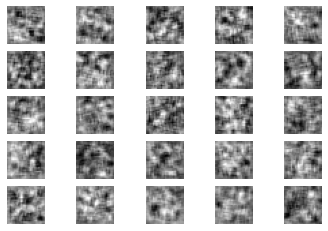

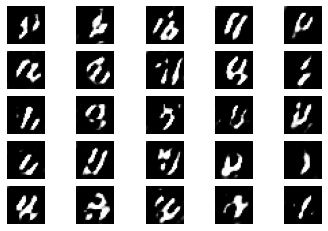

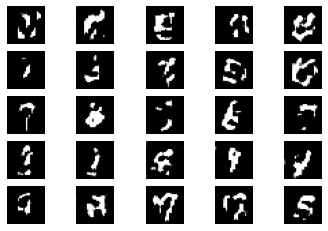

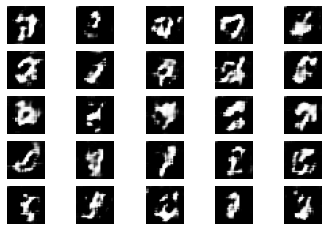

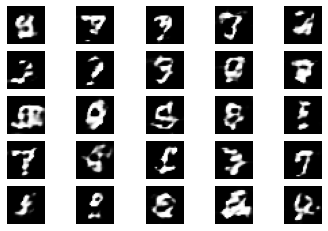

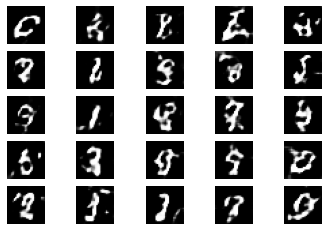

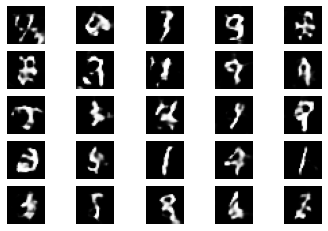

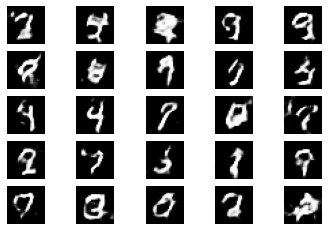

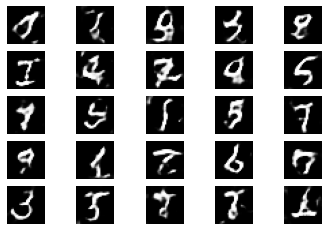

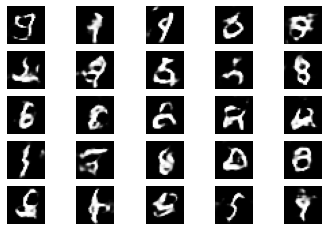

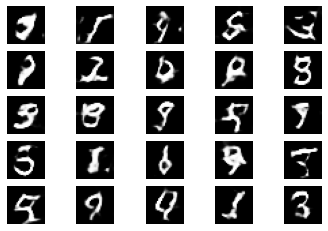

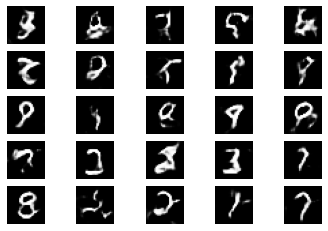

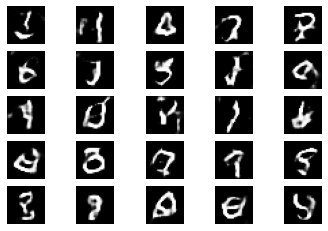

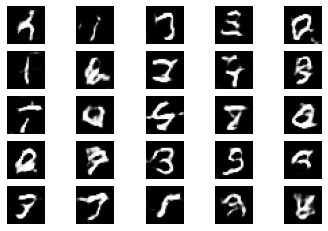

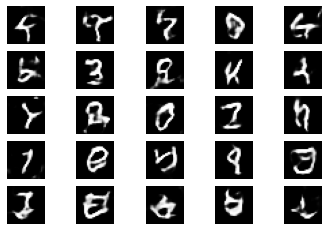

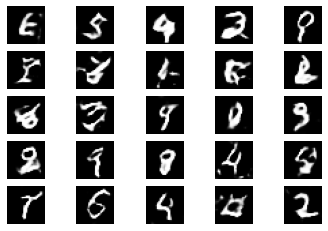

In [ ]:
#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터 불러오기

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀값은 0에서 255사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          #가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          #판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.